In [5]:
%load_ext autoreload
%autoreload 2

import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
file_path = r'n04350905.txt'
file = open(file_path, mode='r')
urls = file.readlines()

In [3]:
image = io.imread(urls[0][:-1])

In [21]:
res = cv2.resize(image, dsize=(256, 256), interpolation=cv2.INTER_NEAREST)
res2 = cv2.resize(image, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)

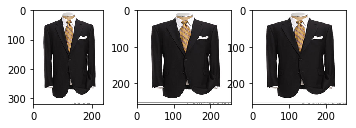

In [22]:
plt.figure(figsize=(10,10))

plt.subplot(5, 5, 1)
plt.imshow(image)
plt.subplot(5, 5, 2)
plt.imshow(res)
plt.subplot(5, 5, 3)
plt.imshow(res2)
plt.show()